In [8]:
# %load import_data.py
import urllib
import pandas as pd
import numpy as np
import pickle

df=pd.read_csv("data/GBP_USD.csv")
#for symbol in list["SYMBOL"]:
#    prices = pd.read_csv("data/GBP_USD.csv")
#    print prices.head()
print df

    

           Date   Price    Open    High     Low Change %
0     31-Jan-17  1.2513  1.2502  1.2519  1.2492    0.22%
1     30-Jan-17  1.2486  1.2548  1.2604  1.2462   -0.87%
2     29-Jan-17  1.2595  1.2586  1.2601  1.2559    0.32%
3     27-Jan-17  1.2555  1.2590  1.2614  1.2514   -0.30%
4     26-Jan-17  1.2593  1.2631  1.2680  1.2554   -0.32%
5     25-Jan-17  1.2634  1.2520  1.2643  1.2488    0.90%
6     24-Jan-17  1.2521  1.2534  1.2546  1.2415   -0.11%
7     23-Jan-17  1.2535  1.2358  1.2546  1.2352    1.29%
8     20-Jan-17  1.2375  1.2341  1.2381  1.2259    0.27%
9     19-Jan-17  1.2342  1.2256  1.2343  1.2250    0.68%
10    18-Jan-17  1.2259  1.2412  1.2417  1.2250   -1.24%
11    17-Jan-17  1.2413  1.2043  1.2415  1.2014    3.03%
12    16-Jan-17  1.2048  1.2058  1.2090  1.1979   -1.08%
13    13-Jan-17  1.2179  1.2155  1.2234  1.2119    0.13%
14    12-Jan-17  1.2163  1.2206  1.2318  1.2148   -0.40%
15    11-Jan-17  1.2212  1.2175  1.2270  1.2036    0.29%
16    10-Jan-17  1.2177  1.2161

2014-12-28-fed-monthly-currency-data.csv
2017.csv
Algorithm Trading using Q-Learning and Recurrent Reinforcement Learning.pdf
An Investigation into the Use of Reinforcement Learning Techniques within the Algorithmic Trading Domain.pdf
BOE-XUDLGPD.csv
BOE-XUDLUSS.csv
Currency Portfolio Optimization (Jaydens-MacBook-Pro.local's conflicted copy 2017-01-19).ipynb
Currency Portfolio Optimization.ipynb
FMAC-HPI_USA.csv
Finance trade.docx
Forecasting of Foreign Currency Exchange Rate Using Neural Network .pdf
Forex-Foreteller- Currency Trend Modeling using News Articles.pdf
ML_Nanodegree_DeepQTrader/
PERTH-USD_JPY_M.csv
Pattern-Recognition-for-Forex-Trading/
Trading with Artificial Neural Nets – High Frequency Trading - Article contest - Dukascopy Community.pdf
Trading-Finance/
UGID-IFIR_USA.csv
Untitled.ipynb
Untitled1.ipynb
Using Recurrent Neural Networks To Forecasting of Forex V.V.Kondratenko1  and Yu. A Kuperin2.pdf
VoiTotalsByAssetClassExcelExport (1).xls
VoiTotalsByAssetClassExcelExpor

In [10]:
#col names: Date	Price	Open	High	Low	Change %

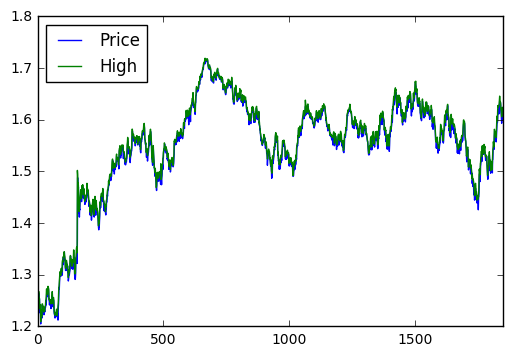

In [15]:
import matplotlib.pyplot as plt
df = pd.read_csv("data/GBP_USD.csv")
df[['Price','High']].plot()
plt.show()

In [19]:

def get_rolling_mean(values, window,min_periods=None):
    return pd.rolling_mean(values, window=window, min_periods=min_periods)


def get_rolling_std(values, window,min_periods=None):
    """Return rolling standard deviation of given values, using specified window size."""
    return pd.rolling_std(values, window=window, min_periods=min_periods)


def get_bollinger_bands(rm, window,min_periods=None):
    rstd=get_rolling_std(rm, window, min_periods)
    upper_band=rm+rstd*2
    lower_band = rm - rstd * 2
    return upper_band, lower_band


def getPrices():
    list = pd.read_csv("data/GBP_USD.csv")
    dates = pd.date_range('2010-01-01', '2016-05-09')
    all = get_data(list["SYMBOL"].values.tolist(),dates)
    fill_missing_values(all)
    all.to_pickle('data/prices.pkl')
    print("{} Prices Saved!".format(len(all)))
    return all

def CalculateAdjSMAs(df):
    for w in [10, 20, 50, 200]:
        sma = get_rolling_mean(df, w, 0)
        adjsma = df / sma-1
        adjsma.to_pickle('data/adjsma{}.pkl'.format(w))
        print("AdjSMA {} Saved!".format(w))

def CalculateBollingerBands(df):
    for w in [10, 20, 50, 200]:
        bbu,bbl = get_bollinger_bands(df, w,0)
        bbu.fillna(method="bfill", inplace="TRUE")
        bbl.fillna(method="bfill", inplace="TRUE")
        bbub=bbu<df
        bblb = bbl > df
        bbub=bbub.applymap(lambda x: 1 if x else 0)
        bblb=bblb.applymap(lambda x: 1 if x else 0)
        bb=bbub-bblb
        bb.to_pickle('data/bb{}.pkl'.format(w))

        print("Bollinger Bands {} Saved!".format(w))

def CalculateBollingerBands(df):
    for w in [10, 20, 50, 200]:
        bbu,bbl = get_bollinger_bands(df, w,0)
        bbu.fillna(method="bfill", inplace="TRUE")
        bbl.fillna(method="bfill", inplace="TRUE")
        bbub=bbu<df
        bblb = bbl > df
        bbub=bbub.applymap(lambda x: 1.0 if x else 0.0)
        bblb=bblb.applymap(lambda x: 1.0 if x else 0.0)
        bb=bbub-bblb
        bb.to_pickle('data/bb{}.pkl'.format(w))

        print("Bollinger Bands {} Saved!".format(w))


def CalculateStates(df,state_size_day,datanames,date_test,save=True):
    date_test_conv=np.datetime64(date_test+'T21:00:00.000000000-0300')
    data = []
    train_states = pd.DataFrame(columns=["State"])
    test_states = pd.DataFrame(columns=["State"])
    nfeatures=0

    print("Calculating States!")

    for name in datanames:
        data.append(pd.read_pickle('data/{}.pkl'.format(name)))

    for i in range(state_size_day-1,len(df)):
        rest_of_features=[]
        for d in data:
            for j in range(i-state_size_day+1,i+1):
                rest_of_features.extend(d.iloc[j].values)
        state=[df.index.values[i]]
        state.extend(rest_of_features)
        nfeatures = len(state)
        if state[0]<=date_test_conv:
            train_states.loc[len(train_states)] = [state]
        else:
            test_states.loc[len(test_states)] = [state]
    if save:
        print "Saving Train Data"
        train_states.to_pickle("data/train.pkl")
        print "Saving Test Data"
        test_states.to_pickle("data/test.pkl")
        print "States Saved! {} dimensions".format(nfeatures)
    return train_states,test_states







if __name__ == "__main__":
    CalculateAdjSMAs(df)
    CalculateBollingerBands(df)
    CalculateStates(df,1,['adjsma20','bb20'],'2016-01-01')
    #getAllData(7,['adjsma20','bb20'])
    #print(getRandomHoldCombinations(10))



/Users/jaydenyuen/anaconda/envs/DAND/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=0,window=10,center=False).mean()
  app.launch_new_instance()


TypeError: unsupported operand type(s) for /: 'str' and 'str'